<a href="https://colab.research.google.com/github/2303A51013/AIML-2025/blob/main/AIML_LAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part-1 Implement Linear Regression Model Using US Housing Data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from google.colab import files

In [8]:
df=pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
print(df.describe(percentiles=[.25,.5,.75,.9]))

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
90%        82081.188283             7.243978                   8.274222   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9

In [18]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


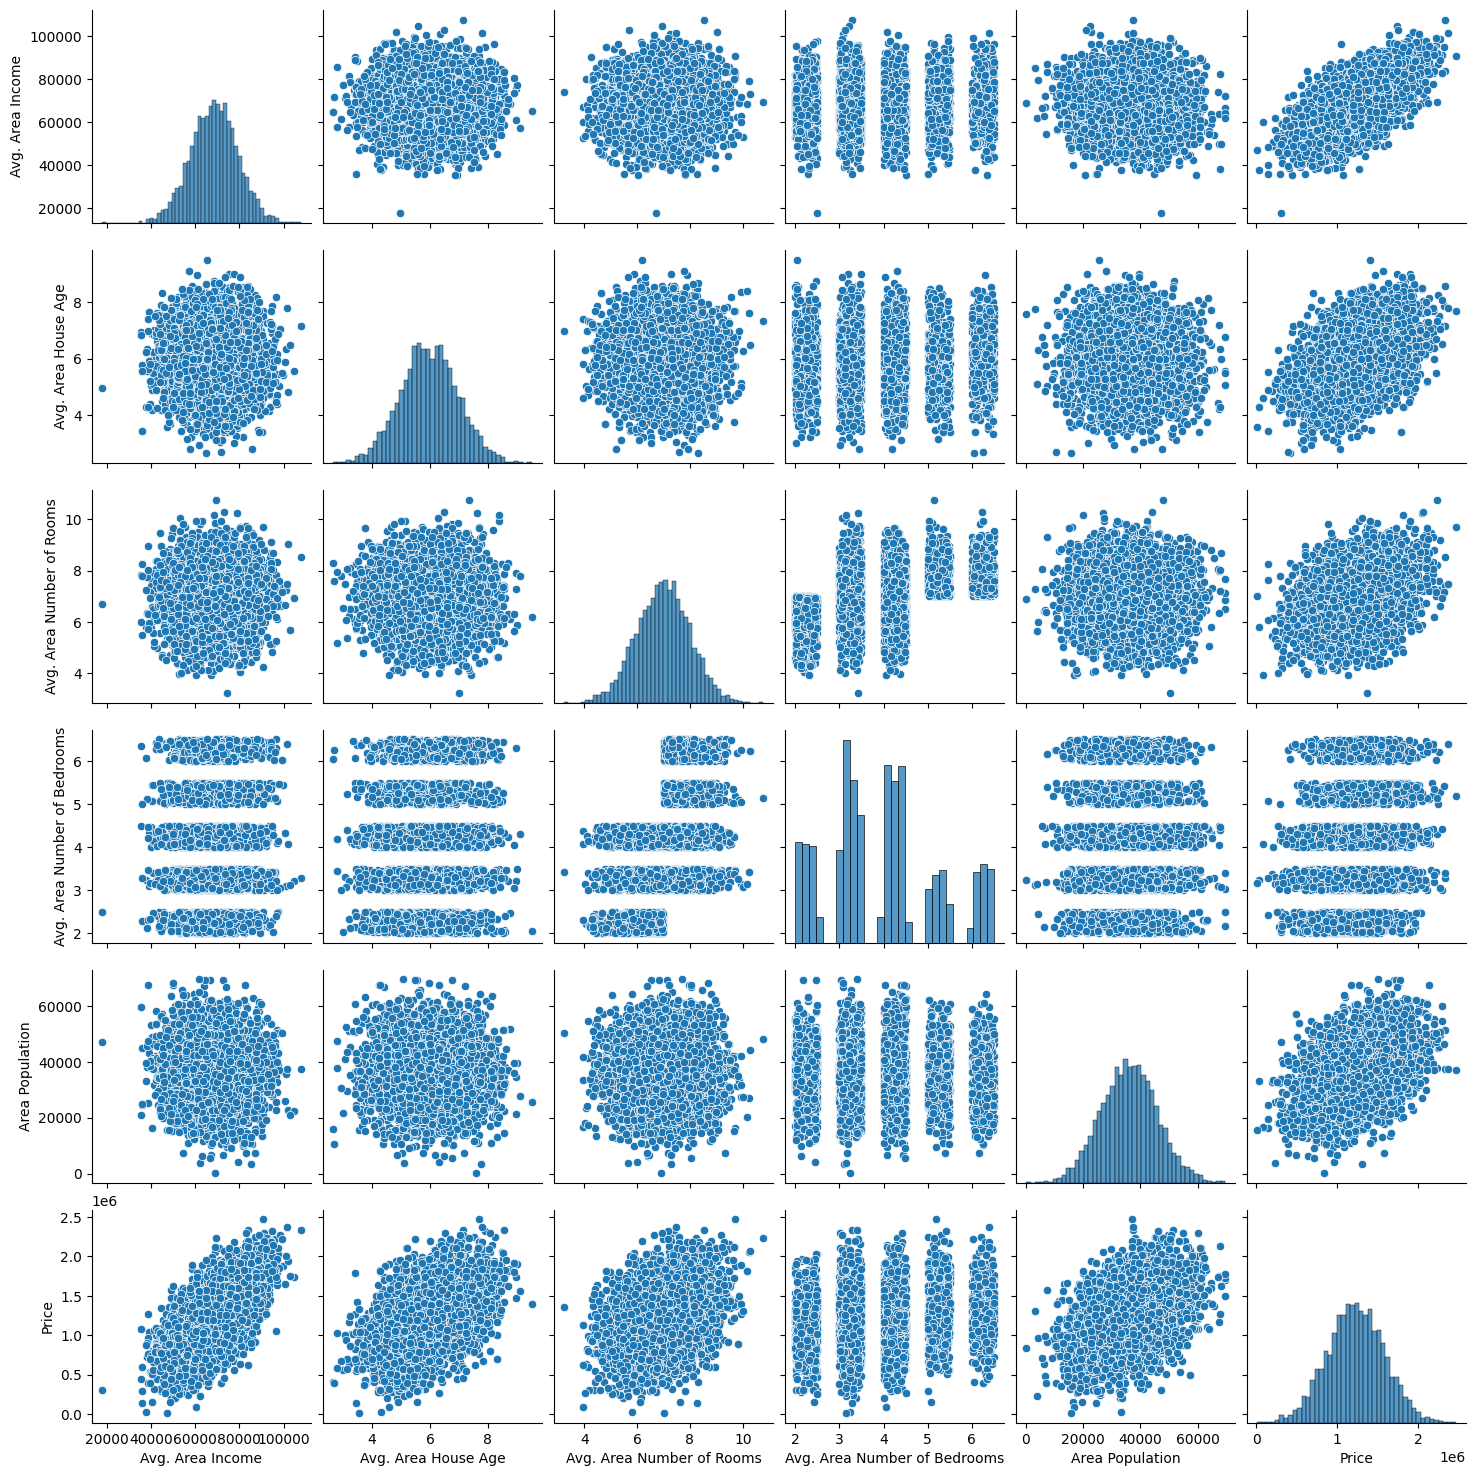

In [22]:
sns.pairplot(df)
plt.show()

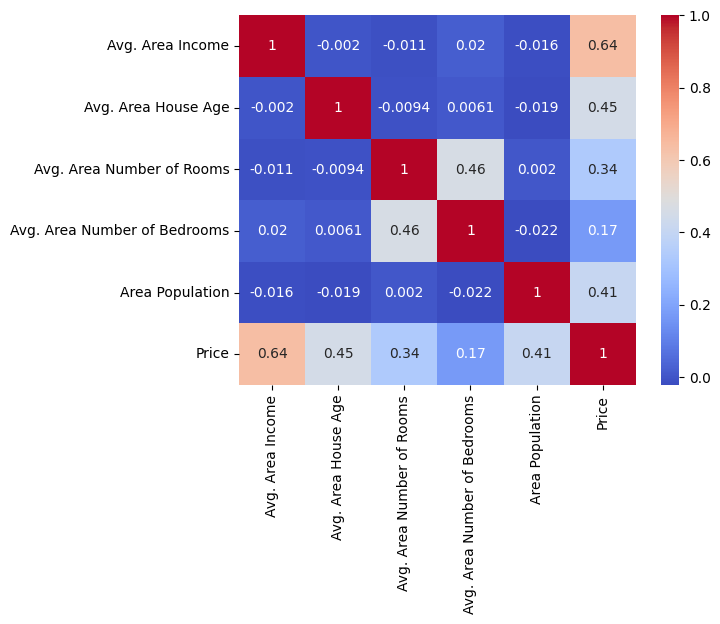

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [39]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y=df['Price']

##Part-2 Model training and Fit the data to Model

In [36]:
X = df.drop(columns='Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Non-numeric columns: Index(['Address'], dtype='object')


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -2635072.900933358
Coefficients: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [46]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -2635072.900933358
Coefficients: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


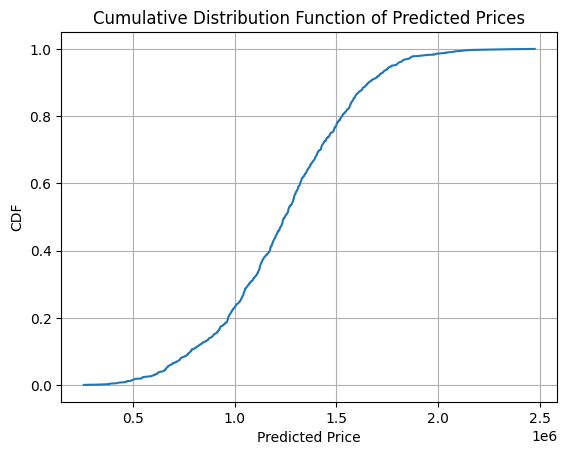

In [47]:
y_pred = model.predict(X_test)
y_sorted = np.sort(y_pred)
cdf = np.arange(1, len(y_sorted)+1) / len(y_sorted)
plt.plot(y_sorted, cdf)
plt.xlabel('Predicted Price')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Predicted Prices')
plt.grid(True)
plt.show()

##Part-3 Model Evaluation Metrics.

In [48]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_const).fit()
std_errors = model_sm.bse
t_statistics = model_sm.tvalues
print("Standard Errors:\n", std_errors)
print("T-Statistics:\n", t_statistics)

Standard Errors:
 const                           19196.093303
Avg. Area Income                    0.149834
Avg. Area House Age              1613.612783
Avg. Area Number of Rooms        1794.398252
Avg. Area Number of Bedrooms     1477.302480
Area Population                     0.160827
dtype: float64
T-Statistics:
 const                          -137.271311
Avg. Area Income                144.508054
Avg. Area House Age             102.048324
Avg. Area Number of Rooms        66.665252
Avg. Area Number of Bedrooms      1.651915
Area Population                  94.948910
dtype: float64


In [49]:
coefficients = model_sm.params[1:]
coeff_sorted = np.sort(coefficients)
cdf = np.arange(1, len(coeff_sorted) + 1) / len(coeff_sorted)
sorted_coefficients = coefficients.sort_values()
print("Sorted Coefficients:\n", sorted_coefficients)
print("CDF of Coefficients:\n", cdf)


Sorted Coefficients:
 Area Population                     15.270313
Avg. Area Income                    21.652206
Avg. Area Number of Bedrooms      2440.377611
Avg. Area Number of Rooms       119624.012232
Avg. Area House Age             164666.480722
dtype: float64
CDF of Coefficients:
 [0.2 0.4 0.6 0.8 1. ]


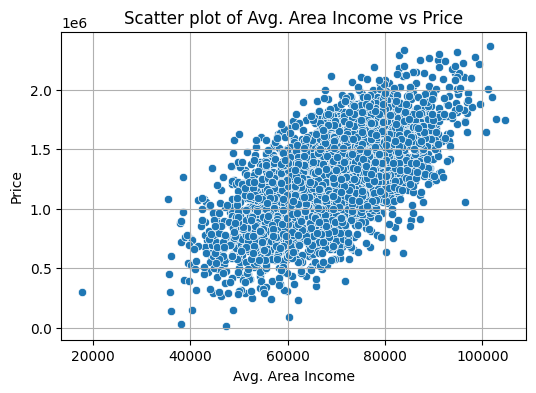

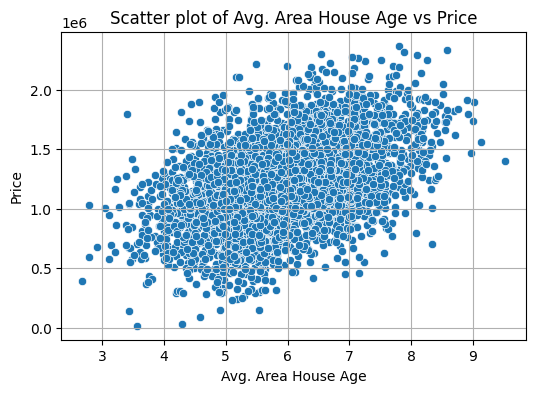

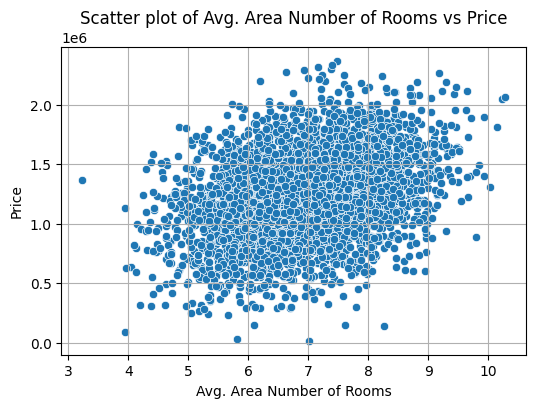

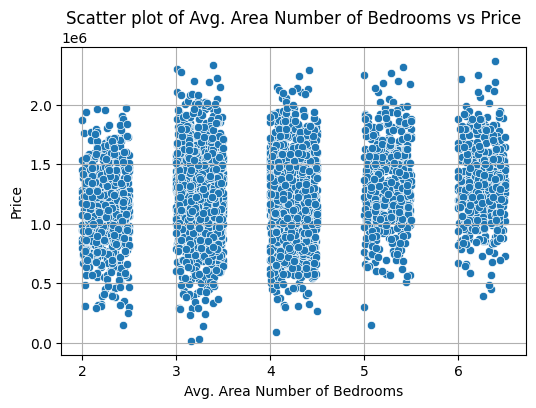

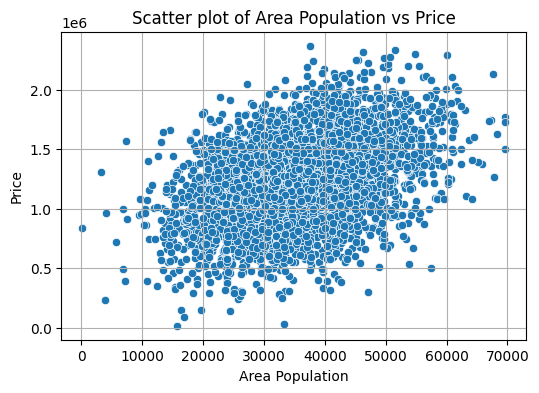

In [50]:
for feature in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of {feature} vs Price')
    plt.grid(True)
    plt.show()